In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 

In [6]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [7]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
tesla = yf.Ticker("TSLA")

In [10]:
tesla_data = tesla.history(period="max")

In [11]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [18]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract tables
tables = soup.find_all('table')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        rows = table.find_all('tr')
        for row in rows[1:]:  # Skip header
            cols = row.find_all('td')
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()  # Keep as-is: with $ and commas
                tesla_revenue = pd.concat(
                    [tesla_revenue, pd.DataFrame([{"Date": date, "Revenue": revenue}])],
                    ignore_index=True
                )

# Display last 5 rows (Revenue remains as string: e.g., "$25,707")
tesla_revenue.tail()

,Date,Revenue
59,2010-06-30,$28
60,2010-03-31,$21
61,2009-12-31,
62,2009-09-30,$46
63,2009-06-30,$27


In [19]:
gme = yf.Ticker("GME")

In [20]:
gme_data = gme.history(period="max")

In [21]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Get the webpage
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Step 2: Find all tables
tables = soup.find_all('table')

# Step 3: Initialize DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 4: Look for the correct table and extract data
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        rows = table.find_all('tr')
        for row in rows[1:]:  # Skip header
            cols = row.find_all('td')
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()  # Keep raw (with $, commas, etc.)
                gme_revenue = pd.concat(
                    [gme_revenue, pd.DataFrame([{"Date": date, "Revenue": revenue}])],
                    ignore_index=True
                )

# Step 5: Display the last 5 rows
gme_revenue.tail()

,Date,Revenue
61,2010-01-31,"$3,524"
62,2009-10-31,"$1,835"
63,2009-07-31,"$1,739"
64,2009-04-30,"$1,981"
65,2009-01-31,"$3,492"


In [46]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index to make 'Date' a column
tesla_data.reset_index(inplace=True)

# Ensure 'Date' is in datetime format
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])

# Now proceed to plot or use the data

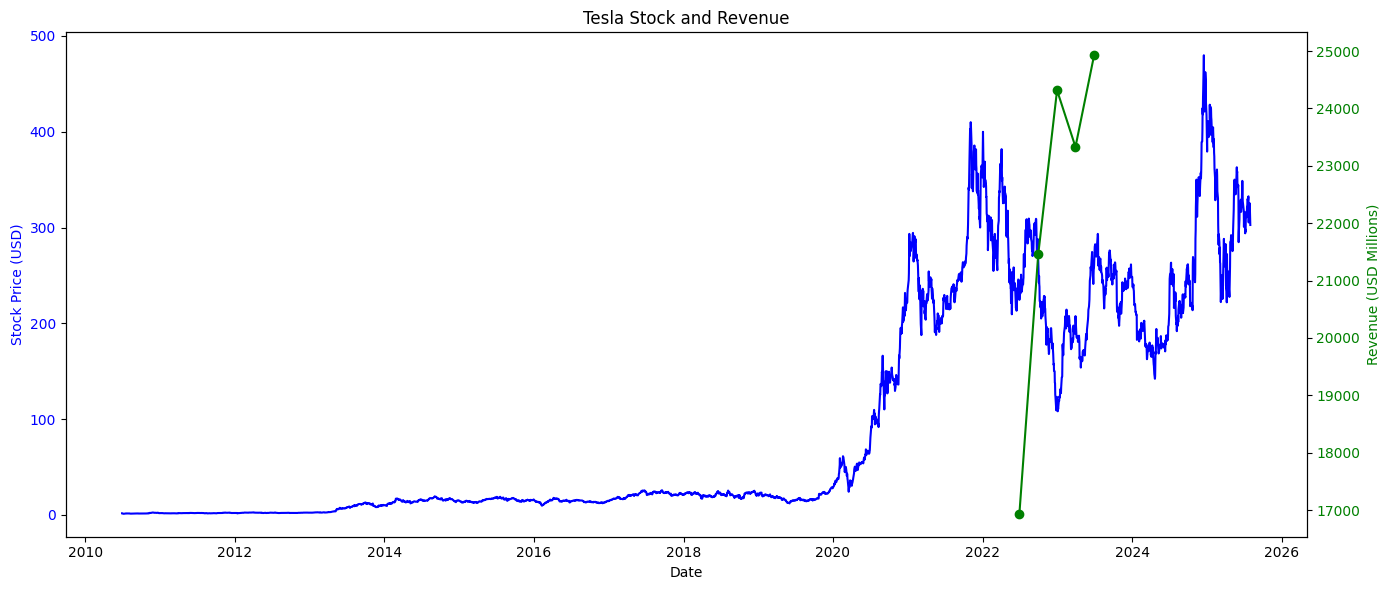

In [47]:
make_graph(tesla_data, tesla_revenue, "Tesla Stock and Revenue")

In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Step 1: Fetch the webpage with a real User-Agent
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
response.raise_for_status()  # Check for any HTTP errors

# Step 2: Parse the HTML using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Find all tables (we know from the page: 2nd table is quarterly revenue)
tables = soup.find_all('table')

# Step 4: Extract the second table (Quarterly Revenue)
quarterly_table = tables[1]  # Second table is quarterly

# Convert HTML table to DataFrame
tesla_revenue = pd.read_html(StringIO(str(quarterly_table)))[0]

# Clean up column names (from multi-level or odd formatting)
tesla_revenue.columns = ["Date", "Revenue"]

# Clean Revenue: remove $, commas, and convert to numeric
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str).str.replace("$", "").str.replace(",", "").str.strip()
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')

# Convert Date to datetime
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Drop NaN rows if any
tesla_revenue.dropna(inplace=True)

# Show last 5 rows
tesla_revenue.tail()

,Date,Revenue
58,2010-09-30,31.0
59,2010-06-30,28.0
60,2010-03-31,21.0
62,2009-09-30,46.0
63,2009-06-30,27.0


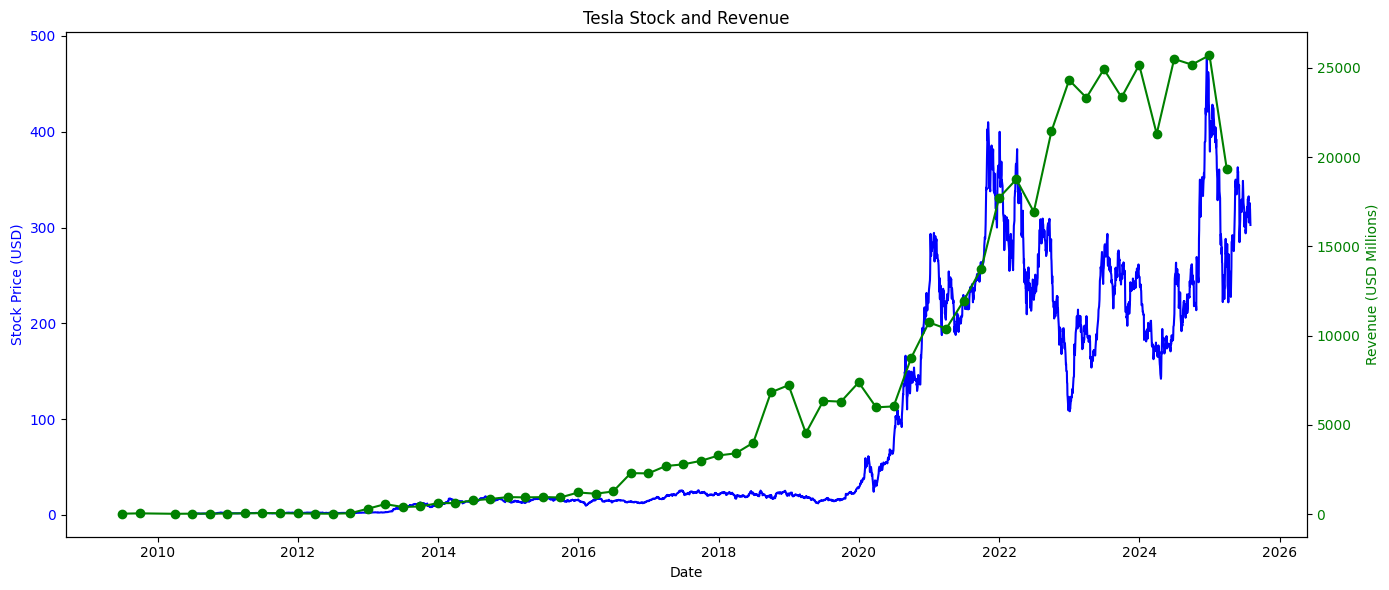

In [50]:
make_graph(tesla_data, tesla_revenue, "Tesla Stock and Revenue")

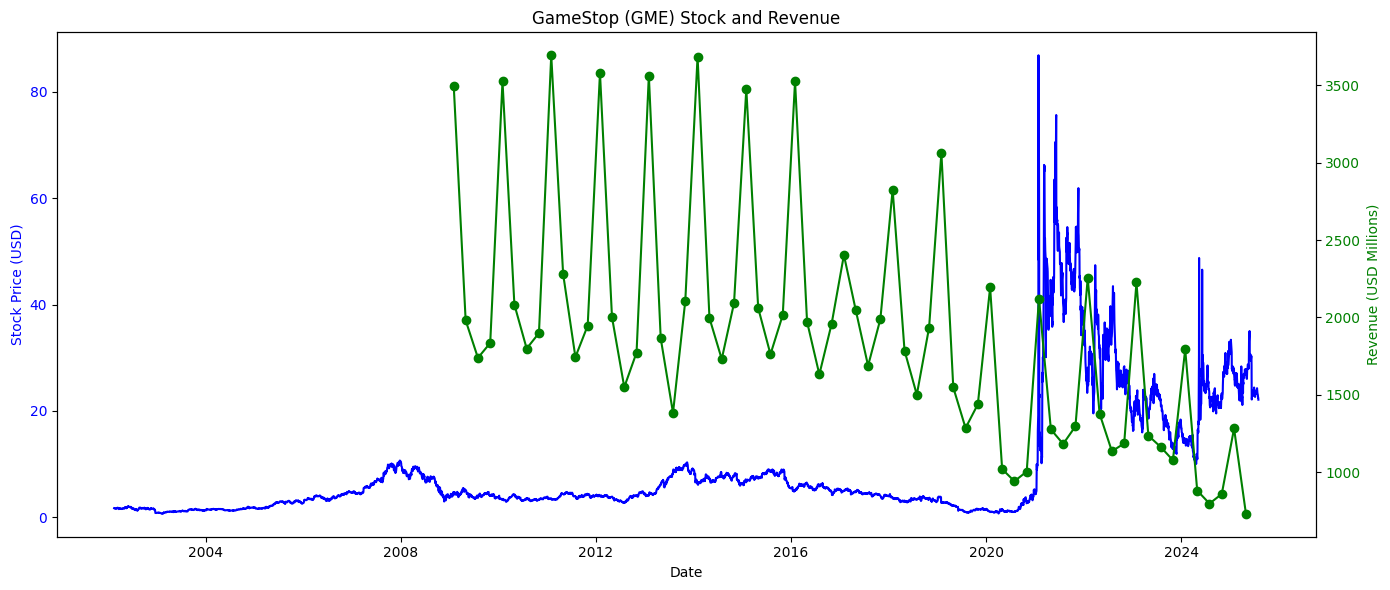

In [51]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# === Step 1: Get GameStop Stock Data ===
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data["Date"] = pd.to_datetime(gme_data["Date"])

# === Step 2: Scrape GameStop Quarterly Revenue ===
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all tables
tables = soup.find_all('table')

# Extract the second table (Quarterly Revenue)
quarterly_table = tables[1]
gme_revenue = pd.read_html(StringIO(str(quarterly_table)))[0]
gme_revenue.columns = ["Date", "Revenue"]

# Clean Revenue: remove $, commas, convert to numeric
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str).str.replace("$", "").str.replace(",", "")
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Drop any rows with NaN
gme_revenue.dropna(inplace=True)

# === Step 3: Plot Using make_graph Function ===
make_graph(gme_data, gme_revenue, "GameStop (GME) Stock and Revenue")